In [1]:
import pandas as pd
import numpy as nm 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
data = pd.read_csv("UberDataset.csv")
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
#cloning the dataset
clone_data = data.copy()

Q1. How does trip purpose vary by category (Business vs. Personal)?

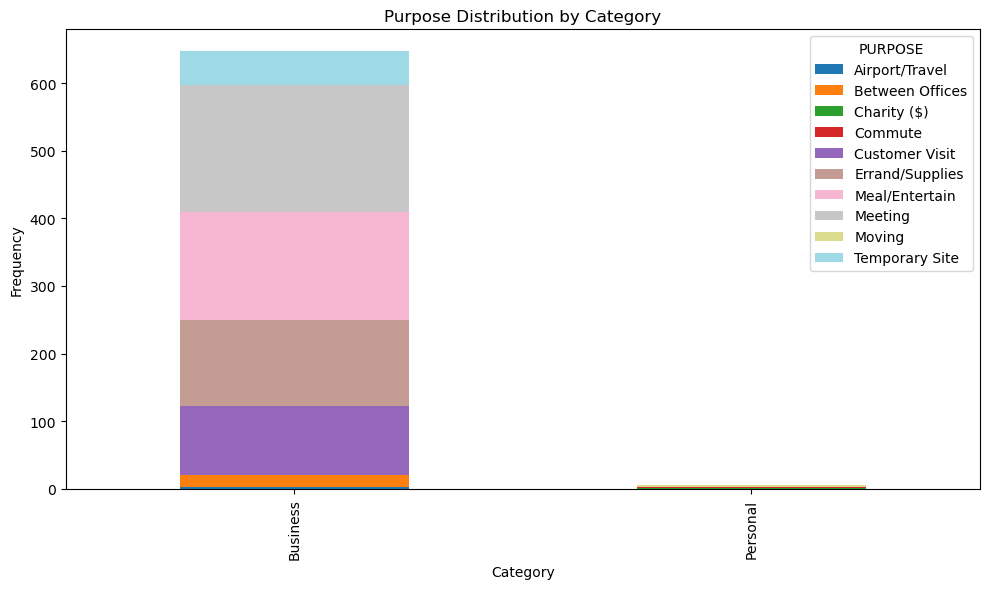

In [9]:
#visualisation
purpose_by_category = clone_data.groupby(['CATEGORY', 'PURPOSE']).size().unstack(fill_value=0)
purpose_by_category.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Purpose Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Q2. What is the most frequent purpose for short vs. long trips?

In [22]:
short_trips = clone_data[clone_data['MILES'] <= 10]['PURPOSE'].value_counts()
short_trips


PURPOSE
Meal/Entertain     62
Meeting            45
Errand/Supplies    44
Customer Visit     28
Temporary Site     12
Between Offices     3
Name: count, dtype: int64

In [23]:
long_trips = clone_data[clone_data['MILES'] > 10]['PURPOSE'].value_counts()
long_trips

PURPOSE
Meeting            36
Customer Visit     18
Between Offices     6
Errand/Supplies     3
Meal/Entertain      2
Temporary Site      2
Name: count, dtype: int64

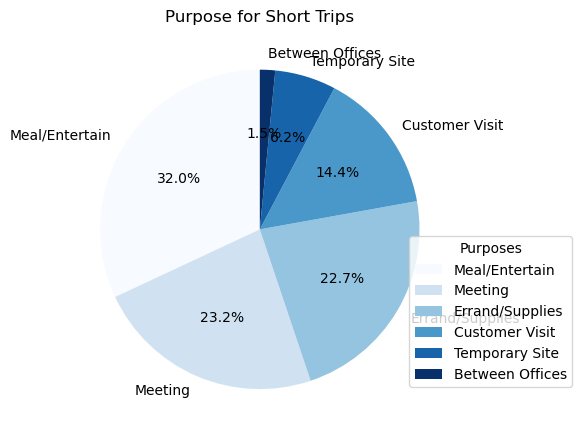

In [ ]:
# Short Trip Purpose visualisation
plt.figure(figsize=(6, 6))
short_trips.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Blues')
plt.title('Purpose for Short Trips')
plt.ylabel('')
plt.legend(title='Purposes', loc='upper right', bbox_to_anchor=(1.3, 0.5))  # Adjust position as needed
plt.tight_layout()
plt.show()

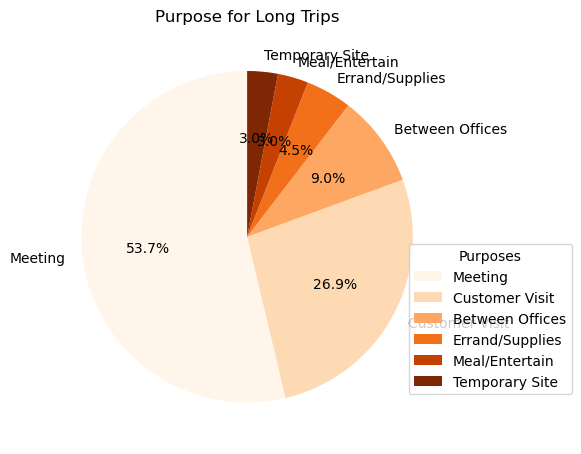

In [ ]:
# Long Trip Purpose visualisation
plt.figure(figsize=(6, 6))
long_trips.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Oranges')
plt.title('Purpose for Long Trips')
plt.ylabel('')
plt.legend(title='Purposes', loc='upper right', bbox_to_anchor=(1.3, 0.5))  # Adjust position as needed
plt.tight_layout()
plt.show()


Q3. How has trip frequency changed over time?

In [24]:
weekly_trips =clone_data ['START_DATE'].dt.to_period('W').value_counts().sort_index()
weekly_trips

START_DATE
2015-12-28/2016-01-03     3
2016-01-04/2016-01-10    10
2016-01-11/2016-01-17    10
2016-02-01/2016-02-07    22
2016-02-08/2016-02-14    18
2016-02-29/2016-03-06    23
2016-03-07/2016-03-13    19
2016-03-28/2016-04-03    11
2016-04-04/2016-04-10     9
2016-04-11/2016-04-17     5
2016-04-25/2016-05-01     5
2016-05-02/2016-05-08    13
2016-05-09/2016-05-15     8
2016-05-30/2016-06-05    15
2016-06-06/2016-06-12    27
2016-06-27/2016-07-03    10
2016-07-04/2016-07-10    28
2016-07-11/2016-07-17     3
2016-08-01/2016-08-07    24
2016-08-08/2016-08-14    19
2016-08-29/2016-09-04     5
2016-09-05/2016-09-11     5
2016-09-12/2016-09-18     3
2016-10-03/2016-10-09    20
2016-10-10/2016-10-16     4
2016-10-31/2016-11-06    29
2016-11-07/2016-11-13    34
2016-11-28/2016-12-04    13
2016-12-05/2016-12-11    21
2016-12-12/2016-12-18     5
Freq: W-SUN, Name: count, dtype: int64

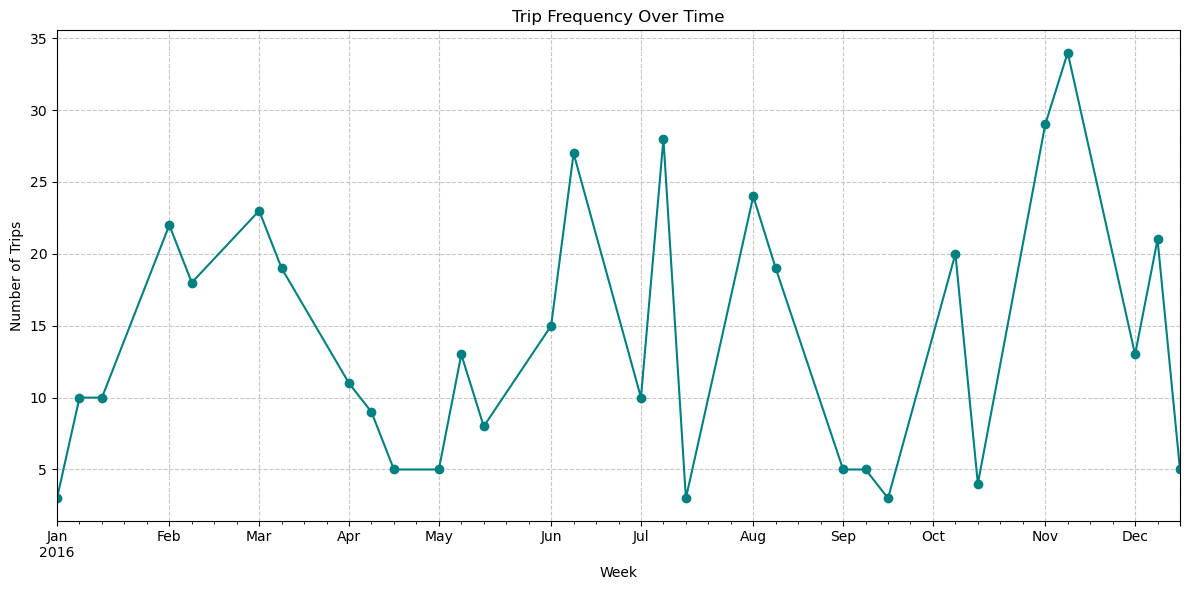

In [25]:
#visualisation
weekly_trips.plot(kind='line', marker='o', figsize=(12, 6), color='teal')
plt.title('Trip Frequency Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Q4. Which day of the week has the highest number of trips?

In [35]:
clone_data['Day_of_Week'] =clone_data['START_DATE'].dt.day_name()
day_of_week_counts = clone_data['Day_of_Week'].value_counts()
day_of_week_counts

Day_of_Week
Friday       87
Monday       62
Tuesday      61
Thursday     61
Saturday     52
Wednesday    50
Sunday       48
Name: count, dtype: int64

C:\Users\prach\AppData\Local\Temp\ipykernel_12980\3454054061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='muted')


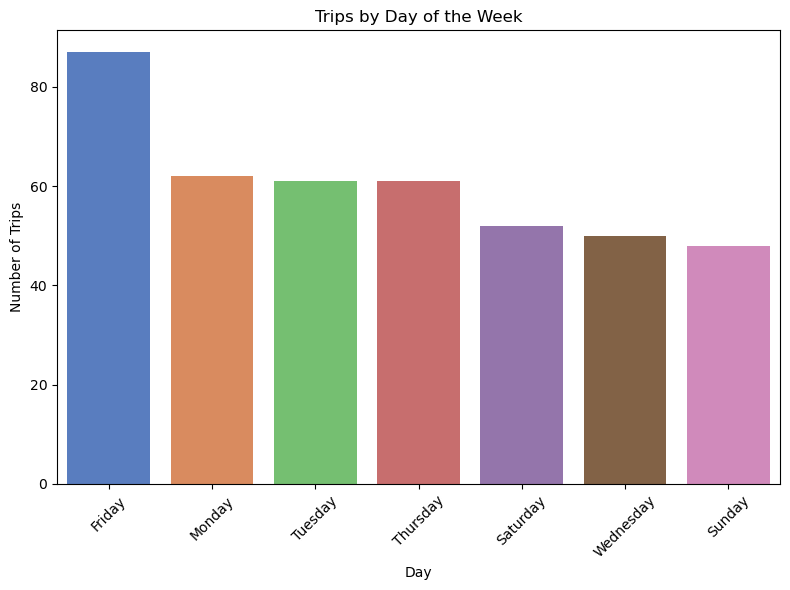

In [33]:
#visualisation
plt.figure(figsize=(8, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='muted')
plt.title('Trips by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q5. What percentage of trips are categorized as Business vs. Personal?

In [36]:
category_counts = clone_data['CATEGORY'].value_counts()
category_counts

CATEGORY
Business    407
Personal     14
Name: count, dtype: int64

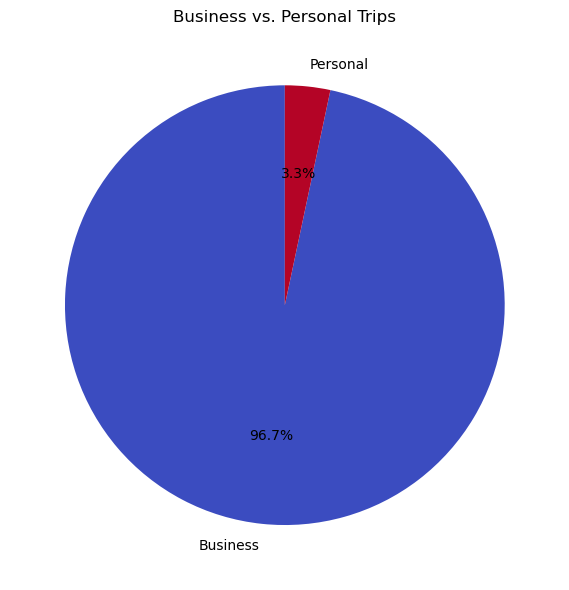

In [37]:
#visualisation
plt.figure(figsize=(6, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='coolwarm')
plt.title('Business vs. Personal Trips')
plt.ylabel('')
plt.tight_layout()
plt.show()